In [389]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [390]:
# import in csv and name columns

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - percentage of lower status of the population
# MEDV - Median value of owner-occupied homes in $10000's

In [391]:
# Features I think would be goodd for clustering
#-- PTRATIO
#-- AGE


In [392]:
file = '/Users/niciat/Downloads/bost_housing_augmented.csv'
boston_data = pd.read_csv(file)
boston_data.head()

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,...,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,...,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,...,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [393]:
# Create a dataframe for the independent variables
independent_variables = boston_data.drop(['CMEDV','MEDV','INDUS', 'LAT','TAX', 'AGE','LON','OBS.', 'TOWN#', 'B', 'TRACT', 'TOWN'],axis=1)
independent_variables.head()

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,PTRATIO,LSTAT
0,0.00632,18.0,0,0.538,6.575,4.0900,1,15.3,4.98
1,0.02731,0.0,0,0.469,6.421,4.9671,2,17.8,9.14
2,0.02729,0.0,0,0.469,7.185,4.9671,2,17.8,4.03
3,0.03237,0.0,0,0.458,6.998,6.0622,3,18.7,2.94
4,0.06905,0.0,0,0.458,7.147,6.0622,3,18.7,5.33


In [394]:
# Choose the dependent variable 
dependent_variable = boston_data['MEDV']

In [395]:
# Create the training sets
X_train, X_test, Y_train, Y_test = train_test_split(independent_variables, dependent_variable, test_size = 0.2, random_state=5)

In [396]:
training_data = boston_data.sample(frac=0.8, random_state=5)
testing_data = boston_data.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 405
No. of testing examples: 101


In [397]:
# Create the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [398]:

# Create the models
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("Performance for training set")
print('R2 score = [ {} ]'.format(r2))
print('RMSE = [ {} ]'.format(rmse))
print("\n")


y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Performance for testing set")
print('R2 score = [ {} ]'.format(r2))
print('RMSE score = [ {} ]'.format(rmse))


Performance for training set
R2 score = [ 0.7205589620756452 ]
RMSE = [ 4.899434613036799 ]


Performance for testing set
R2 score = [ 0.7457528698651539 ]
RMSE score = [ 4.4616130967660155 ]


In [399]:
boston_data['MEDV'] = boston_data['MEDV'] * (114.33/27.52) 
boston_data['MEDV']


0       99.706395
1       89.735756
2      144.158830
3      138.758067
4      150.390480
          ...    
501     93.059302
502     85.581323
503     99.290952
504     91.397529
505     49.437754
Name: MEDV, Length: 506, dtype: float64

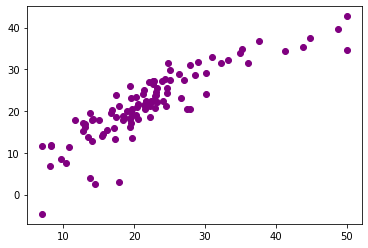

In [400]:
plt.scatter(Y_test, y_test_predict, c = 'purple')